In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

/Users/kirill/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
digits = sklearn.datasets.load_digits()

In [3]:
digits.data[0].shape

(64,)

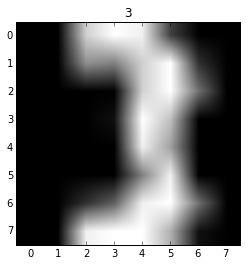

In [4]:
index = 89
plt.imshow(digits.data[index].reshape(8, 8), cmap='gray')
plt.title(digits.target[index])

In [6]:
import numpy as np

In [7]:
x = np.array([
        [
            [1, 0, 1, 1, 2], 
            [1, 2, 1, 2, 1],
            [0, 0, 2, 1, 1],
            [0, 1, 0, 1, 2],
            [2, 0, 2, 1, 0]
        ],
        [
            [0, 0, 1, 2, 0],
            [0, 0, 0, 1, 1],
            [0, 0, 0, 2, 2],
            [2, 1, 2, 2, 2],
            [2, 1, 2, 1, 0]
        ],
        [
            [0, 0, 2, 2, 1],
            [0, 2, 1, 0, 2],
            [1, 2, 0, 1, 1],
            [0, 2, 1, 1, 2],
            [2, 0, 0, 1, 1]
        ]
        ]).transpose(1, 2, 0)

In [ ]:
x[:, :, 0]

In [ ]:
def zero_padding_3d(x: np.array, p = 1):
    z0 = np.zeros((p, x.shape[1], x.shape[2]), dtype=x.dtype)
    z1 = np.zeros((x.shape[0] + p*2, p, x.shape[2]), dtype=x.dtype)
    x_padded = np.concatenate((z1, np.concatenate((z0, x, z0), axis=0), z1), axis=1)
    return x_padded

Zero padding: P = 1

In [ ]:
x_zero_padded = zero_padding_3d(x, p=1)

In [ ]:
x_zero_padded[:, :, 0]

In [ ]:
w0 = np.array([
        [
            [0, 0, 0],
            [1, 0, 0],
            [1, -1, -1]
        ],
        [
            [-1, 0, 1],
            [0, -1, -1],
            [-1, 1, 0]
        ],
        [
            [1, -1, 0],
            [-1, 0, 1],
            [-1, 0, -1]
        ]
    ]).transpose(1, 2, 0)

b0 = np.array([1])[np.newaxis, np.newaxis, :]

In [ ]:
w0[:, :, 0], b0[:, :, 0]

In [ ]:
s = 2
f = 3

In [ ]:
def output_volume_size(input_shape, f, p, s):
    return ((input_shape[0]-f+2*p)/s+1, (input_shape[1]-f+2*p)/s+1)

In [ ]:
output_volume_size(x.shape, f, p, s)

In [ ]:
w0.reshape(27)

In [ ]:
np.tile(np.pad(np.array([[1, 2], [3, 4]]), ((p, p)), mode='constant'), (2, 2))

In [8]:
def get_im2col_indices(x_shape, field_height, field_width, padding=1, stride=1):
  # First figure out what the size of the output should be
  N, C, H, W = x_shape
  assert (H + 2 * padding - field_height) % stride == 0
  assert (W + 2 * padding - field_height) % stride == 0
  out_height = (H + 2 * padding - field_height) / stride + 1
  out_width = (W + 2 * padding - field_width) / stride + 1

  i0 = np.repeat(np.arange(field_height), field_width)
  i0 = np.tile(i0, C)
  i1 = stride * np.repeat(np.arange(out_height), out_width)
  j0 = np.tile(np.arange(field_width), field_height * C)
  j1 = stride * np.tile(np.arange(out_width), out_height)
  i = i0.reshape(-1, 1) + i1.reshape(1, -1)
  j = j0.reshape(-1, 1) + j1.reshape(1, -1)

  k = np.repeat(np.arange(C), field_height * field_width).reshape(-1, 1)

  return (k, i, j)

def im2col_indices(x, field_height, field_width, padding=1, stride=1):
  """ An implementation of im2col based on some fancy indexing """
  # Zero-pad the input
  p = padding
  x_padded = np.pad(x, ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

  k, i, j = get_im2col_indices(x.shape, field_height, field_width, padding,
                               stride)

  cols = x_padded[:, k, i, j]
  C = x.shape[1]
  cols = cols.transpose(1, 2, 0).reshape(field_height * field_width * C, -1)
  return cols

In [11]:
im2col_indices(x_digits, 3, 3)

/Users/kirill/anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:873: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return c.reshape(shape_out)


IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
digits.data.shape

In [10]:
x_digits = np.expand_dims(digits.data.reshape(-1, 8, 8), axis=1)

In [ ]:
plt.imshow(x_digits[0, 0, :, :], cmap='gray')

In [15]:
p = 1
x_toy = np.array(
[
    [
        [
          [0, 1, 2],
          [3, 4, 5],
          [6, 7, 8]
        ],
        [
          [-1, -3, -4],
          [-3, -2, -7],
          [-6, -7, -1]
        ] 
    ],
    [
        [
          [10, 10, 20],
          [30, 40, 50],
          [60, 70, 80]
        ],
        [
          [-10, -30, -40],
          [-30, -20, -70],
          [-60, -70, -10]
        ] 
    ]   
])

In [16]:
x_toy_padded = np.pad(x_toy, ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

In [17]:
x_toy_padded

array([[[[  0,   0,   0,   0,   0],
         [  0,   0,   1,   2,   0],
         [  0,   3,   4,   5,   0],
         [  0,   6,   7,   8,   0],
         [  0,   0,   0,   0,   0]],

        [[  0,   0,   0,   0,   0],
         [  0,  -1,  -3,  -4,   0],
         [  0,  -3,  -2,  -7,   0],
         [  0,  -6,  -7,  -1,   0],
         [  0,   0,   0,   0,   0]]],


       [[[  0,   0,   0,   0,   0],
         [  0,  10,  10,  20,   0],
         [  0,  30,  40,  50,   0],
         [  0,  60,  70,  80,   0],
         [  0,   0,   0,   0,   0]],

        [[  0,   0,   0,   0,   0],
         [  0, -10, -30, -40,   0],
         [  0, -30, -20, -70,   0],
         [  0, -60, -70, -10,   0],
         [  0,   0,   0,   0,   0]]]])

In [88]:
f = 3
w = 3
h = 3
p = 1
s = 2
c = 2
output_width = (w - f + 2*p)/s + 1
output_height = (h - f + 2*p)/s + 1
output_width, output_height

(2.0, 2.0)

In [ ]:
def im2col

In [98]:
io = np.repeat(s*np.arange(output_height, dtype=np.int32), output_height*f*f*c)
io

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int32)

In [100]:
ko = np.tile(np.repeat(s*np.arange(output_width, dtype=np.int32), f*f), output_width*c)
ko

/Users/kirill/anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:873: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return c.reshape(shape_out)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int32)

In [101]:
i + io, k + ko

(array([0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1,
        1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 2,
        2, 2, 3, 3, 3, 4, 4, 4, 2, 2, 2, 3, 3, 3, 4, 4, 4, 2, 2, 2, 3, 3, 3,
        4, 4, 4], dtype=int32),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 3, 4, 2, 3, 4, 2, 3, 4, 0, 1, 2, 0, 1,
        2, 0, 1, 2, 2, 3, 4, 2, 3, 4, 2, 3, 4, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2,
        3, 4, 2, 3, 4, 2, 3, 4, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 3, 4, 2, 3, 4,
        2, 3, 4], dtype=int32))

In [106]:
j = np.tile(np.repeat(np.arange(c, dtype=np.int32), f*f), output_height*c)
j

/Users/kirill/anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:873: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return c.reshape(shape_out)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [107]:
i = np.tile(np.tile(np.repeat(np.arange(f, dtype=np.int32), f), output_height*output_width), c)
k = np.tile(np.tile(np.tile(np.arange(f, dtype=np.int32), f), output_height*output_width), c)

x_toy_padded[0, j, i + io, k + ko].reshape(output_height*output_width, -1)

/Users/kirill/anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:873: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return c.reshape(shape_out)
/Users/kirill/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([[ 0,  0,  0,  0,  0,  1,  0,  3,  4,  0,  0,  0, -3, -4,  0, -2, -7,
         0],
       [ 0,  0,  0,  0,  0,  1,  0,  3,  4,  0,  0,  0, -3, -4,  0, -2, -7,
         0],
       [ 0,  3,  4,  0,  6,  7,  0,  0,  0, -2, -7,  0, -7, -1,  0,  0,  0,
         0],
       [ 0,  3,  4,  0,  6,  7,  0,  0,  0, -2, -7,  0, -7, -1,  0,  0,  0,
         0]])

In [ ]:
x_toy_padded[:, :, [0, 0, 1, 1], [0, 0, 3, 3]]

In [ ]:
w0 = np.array([
        [
            [-1, 0, 1],
            [0, -1, 0],
            [2, 3, 4]
        ],
        [
            [2, 5, 8],
            [-1, -1, 1],
            [3, 4, 2]
        ]
    ])

In [ ]:
from scipy.signal import convolve2d, convolve

In [ ]:
convolve(x_toy, w0, mode='full')

In [ ]:
w0.ravel()

In [ ]:
w0.reshape(2, 9)

In [ ]:
x_toy_padded[:, :, [0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]].transpose(1, 2, 0).shape

In [ ]:
f = 3
p = 1
s = 1
np.sum(np.dot(w0.reshape(2, 9), x_toy_padded[:, :, [0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]].transpose(1, 2, 0)), axis=0)